Homework 4: Sentiment Analysis - Task 4
----

Names & Sections
----
Names: Shashidhar Gollamudi - 6120
       Sunny Huang - 4120


Task 4: Neural Networks (20 points)
----

Next, we'll train a feedforward neural net to work with this data. You'll train one neural net which takes the same input as your Logistic Regression model - a sparse vector representing documents as bags of words.

In [1]:
import sentiment_utils as sutils
import numpy as np

from keras.models import Sequential
from keras.layers import Dense

# you can experiment with having some Dropout layers if you'd like to
# this is not required
from keras.layers import Dropout

# if you want to use this again
from sklearn.feature_extraction.text import CountVectorizer



[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sunnyh2024/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# define constants for the files we are using
TRAIN_FILE = "movie_reviews_train.txt"
DEV_FILE = "movie_reviews_dev.txt"

# load in your data and make sure you understand the format
# Do not print out too much so as to impede readability of your notebook
train_tups = sutils.generate_tuples_from_file(TRAIN_FILE)
dev_tups = sutils.generate_tuples_from_file(DEV_FILE)

x_train, y_train = train_tups
x_dev, y_dev = dev_tups

# you may use either your sparse vectors or sklearn's CountVectorizer's sparse vectors
# you will experiment with multinomial and binarized representations later

# USING SUTILS FUNCTIONS SLOWS DOWN MODEL.FIT ALOT
# vocab = sutils.create_index(x_train)
# x_train_vectors = sutils.featurize(vocab, x_train, binary=False)
# x_dev_vectors = sutils.featurize(vocab, x_dev, binary=False)

x_train_sents = [' '.join(review) for review in x_train]
x_dev_sents = [' '.join(review) for review in x_dev]

count_vectorizer = CountVectorizer(binary=False)
count_vectorizer.fit(x_train_sents)

count_vectorizer_binomial = CountVectorizer(binary=True)
count_vectorizer_binomial.fit(x_train_sents)

x_train_vectors = count_vectorizer.transform(x_train_sents)
x_dev_vectors = count_vectorizer.transform(x_dev_sents)

x_train_vectors_binomial = count_vectorizer_binomial.transform(x_train_sents)
x_dev_vectors_binomial = count_vectorizer_binomial.transform(x_dev_sents)

vocab = count_vectorizer.get_feature_names_out()

print(f'Vocab size: {len(vocab)}')

Vocab size: 22596


In [3]:
# Create a feedforward neural network model
# that takes a sparse BoW representation of the data as input
# and makes a binary classification of positive/negative sentiment as output
# you may use any number of hidden layers >= 1 and any number of units in each hidden layer (we recommend between 50-200)
# you may use any activation function on the hidden layers 
# you should use a sigmoid activation function on the output layer
# you should use binary cross-entropy as your loss function
# sgd is an appropriate optimizer for this task
# you should report accuracy as your metric
# you may add Dropout layers if you'd like to
num_epochs = 3
hidden_units = 100

# create/compile your model in this cell
model = Sequential()

model.add(Dense(units=hidden_units, activation="relu", input_dim=len(vocab)))

# put in an output layer
model.add(Dense(units=1, activation='sigmoid'))

model.summary()
# call compile here
model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy']
              )


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               2259700   
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 2,259,801
Trainable params: 2,259,801
Non-trainable params: 0
_________________________________________________________________


How many trainable parameters does your model have? __2,259,801__

In [4]:
# train your model
# Felix's computer takes about 2 sec for 3 epochs
# reports an accuracy of 0.78 at that point using the sgd optimizer

model.fit(x_train_vectors, np.array(y_train), epochs=num_epochs, verbose=1)

# Failed to find data adapter that can handle input: <class 'numpy.ndarray'>, (<class 'list'> containing values of types {"<class 'int'>"})
# indicates you should change a list into a numpy array



Epoch 1/3
 1/50 [..............................] - ETA: 8s - loss: 0.7005 - accuracy: 0.5312

2023-10-26 00:58:11.911412: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [1600]
	 [[{{node Placeholder/_1}}]]
2023-10-26 00:58:11.911559: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [1600]
	 [[{{node Placeholder/_1}}]]
2023-10-26 00:58:12.034221: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


50/50 [==============================] - 0s 1ms/step - loss: 0.6836 - accuracy: 0.5663
Epoch 2/3
50/50 [==============================] - 0s 1ms/step - loss: 0.6346 - accuracy: 0.6662
Epoch 3/3
50/50 [==============================] - 0s 1ms/step - loss: 0.6065 - accuracy: 0.6950


In [5]:
# make a prediction on the dev set
# then make a classification decision based on that prediction
# predicting all examples takes < 1 sec on Felix's computer
preds = model.predict(x_dev_vectors, verbose=1)
preds = [np.round(pred[0]) for pred in preds]
print(preds)

7/7 [==============================] - 0s 2ms/step
[1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

2023-10-26 00:58:12.288228: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [200,3]
	 [[{{node Placeholder/_0}}]]


In [6]:
# use the model.evaluate function to report the loss and accuracy on the dev set
metrics = model.evaluate(x_dev_vectors, np.array(y_dev), verbose=1)
print(f'Loss: {metrics[0]}')
print(f'Accuracy: {metrics[1]}')

7/7 [==============================] - 0s 937us/step - loss: 0.6123 - accuracy: 0.6700
Loss: 0.6123297810554504
Accuracy: 0.6700000166893005


2023-10-26 00:58:12.356788: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [200]
	 [[{{node Placeholder/_1}}]]


Epoch 1/3


2023-10-26 00:58:12.443708: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [1600]
	 [[{{node Placeholder/_1}}]]
2023-10-26 00:58:12.443861: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [1600]
	 [[{{node Placeholder/_1}}]]


50/50 [==============================] - 0s 1ms/step - loss: 0.6785 - accuracy: 0.5919
Epoch 2/3
50/50 [==============================] - 0s 1ms/step - loss: 0.6242 - accuracy: 0.6825
Epoch 3/3
50/50 [==============================] - 0s 1ms/step - loss: 0.5935 - accuracy: 0.7100
F1 Score for multinomial: 0.656084656084656
Epoch 1/3
 1/50 [..............................] - ETA: 7s - loss: 0.6855 - accuracy: 0.5625

2023-10-26 00:58:12.810152: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [200,3]
	 [[{{node Placeholder/_0}}]]
2023-10-26 00:58:12.859432: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [1600]
	 [[{{node Placeholder/_1}}]]
2023-10-26 00:58:12.859581: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [1600

50/50 [==============================] - 0s 1ms/step - loss: 0.6887 - accuracy: 0.5481
Epoch 2/3
50/50 [==============================] - 0s 1ms/step - loss: 0.6659 - accuracy: 0.6994
Epoch 3/3
50/50 [==============================] - 0s 1ms/step - loss: 0.6382 - accuracy: 0.7738
F1 Score for binomial: 0.7982456140350878
Epoch 1/3
5/5 [==============================] - 0s 2ms/step - loss: 0.6919 - accuracy: 0.5188
Epoch 2/3


2023-10-26 00:58:13.222332: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [200,3]
	 [[{{node Placeholder/_0}}]]
2023-10-26 00:58:13.265324: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [160,3]
	 [[{{node Placeholder/_0}}]]
2023-10-26 00:58:13.265480: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [1

5/5 [==============================] - 0s 2ms/step - loss: 0.6825 - accuracy: 0.5938
Epoch 3/3
5/5 [==============================] - 0s 2ms/step - loss: 0.6711 - accuracy: 0.6375
Epoch 1/3
 1/10 [==>...........................] - ETA: 1s - loss: 0.6970 - accuracy: 0.4062

2023-10-26 00:58:13.444009: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [200,3]
	 [[{{node Placeholder/_0}}]]
2023-10-26 00:58:13.488181: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [320]
	 [[{{node Placeholder/_1}}]]
2023-10-26 00:58:13.488347: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [320]


10/10 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5312
Epoch 2/3
10/10 [==============================] - 0s 5ms/step - loss: 0.6808 - accuracy: 0.6031
Epoch 3/3
10/10 [==============================] - 0s 2ms/step - loss: 0.6697 - accuracy: 0.7000
Epoch 1/3
 1/15 [=>............................] - ETA: 2s - loss: 0.6959 - accuracy: 0.5000

2023-10-26 00:58:13.731739: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [200,3]
	 [[{{node Placeholder/_0}}]]
2023-10-26 00:58:13.774521: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [480,3]
	 [[{{node Placeholder/_0}}]]
2023-10-26 00:58:13.774673: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [4

15/15 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.5063
Epoch 2/3
15/15 [==============================] - 0s 1ms/step - loss: 0.6800 - accuracy: 0.6167
Epoch 3/3
15/15 [==============================] - 0s 2ms/step - loss: 0.6661 - accuracy: 0.7208
Epoch 1/3
 1/20 [>.............................] - ETA: 2s - loss: 0.6841 - accuracy: 0.5625

2023-10-26 00:58:13.999334: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [200,3]
	 [[{{node Placeholder/_0}}]]
2023-10-26 00:58:14.042192: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [640]
	 [[{{node Placeholder/_1}}]]
2023-10-26 00:58:14.042341: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [640]


20/20 [==============================] - 0s 2ms/step - loss: 0.6864 - accuracy: 0.5766
Epoch 2/3
20/20 [==============================] - 0s 1ms/step - loss: 0.6704 - accuracy: 0.6594
Epoch 3/3
20/20 [==============================] - 0s 2ms/step - loss: 0.6546 - accuracy: 0.7172
Epoch 1/3
 1/25 [>.............................] - ETA: 3s - loss: 0.6903 - accuracy: 0.6250

2023-10-26 00:58:14.286889: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [200,3]
	 [[{{node Placeholder/_0}}]]
2023-10-26 00:58:14.330782: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [800,3]
	 [[{{node Placeholder/_0}}]]
2023-10-26 00:58:14.330931: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [8

25/25 [==============================] - 0s 2ms/step - loss: 0.6907 - accuracy: 0.5412
Epoch 2/3
25/25 [==============================] - 0s 1ms/step - loss: 0.6708 - accuracy: 0.6500
Epoch 3/3
25/25 [==============================] - 0s 1ms/step - loss: 0.6503 - accuracy: 0.7900
Epoch 1/3


2023-10-26 00:58:14.593031: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [200,3]
	 [[{{node Placeholder/_0}}]]
2023-10-26 00:58:14.639628: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [960]
	 [[{{node Placeholder/_1}}]]
2023-10-26 00:58:14.639818: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [960]


30/30 [==============================] - 0s 2ms/step - loss: 0.6886 - accuracy: 0.5469
Epoch 2/3
30/30 [==============================] - 0s 1ms/step - loss: 0.6694 - accuracy: 0.7063
Epoch 3/3
30/30 [==============================] - 0s 1ms/step - loss: 0.6481 - accuracy: 0.7510
Epoch 1/3


2023-10-26 00:58:14.943055: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [200,3]
	 [[{{node Placeholder/_0}}]]
2023-10-26 00:58:14.988624: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [1120]
	 [[{{node Placeholder/_1}}]]
2023-10-26 00:58:14.988773: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [1120

35/35 [==============================] - 0s 1ms/step - loss: 0.6883 - accuracy: 0.5357
Epoch 2/3
35/35 [==============================] - 0s 1ms/step - loss: 0.6672 - accuracy: 0.6893
Epoch 3/3
35/35 [==============================] - 0s 1ms/step - loss: 0.6440 - accuracy: 0.7875
Epoch 1/3
 1/40 [..............................] - ETA: 5s - loss: 0.7006 - accuracy: 0.5000

2023-10-26 00:58:15.303104: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [200,3]
	 [[{{node Placeholder/_0}}]]
2023-10-26 00:58:15.347266: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [1280]
	 [[{{node Placeholder/_1}}]]
2023-10-26 00:58:15.347411: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [1280

40/40 [==============================] - 0s 2ms/step - loss: 0.6895 - accuracy: 0.5367
Epoch 2/3
40/40 [==============================] - 0s 1ms/step - loss: 0.6693 - accuracy: 0.6820
Epoch 3/3
40/40 [==============================] - 0s 2ms/step - loss: 0.6467 - accuracy: 0.7719
Epoch 1/3
 1/45 [..............................] - ETA: 6s - loss: 0.7048 - accuracy: 0.5312

2023-10-26 00:58:15.728066: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [200,3]
	 [[{{node Placeholder/_0}}]]
2023-10-26 00:58:15.771919: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [1440]
	 [[{{node Placeholder/_1}}]]
2023-10-26 00:58:15.772070: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [1440

45/45 [==============================] - 0s 1ms/step - loss: 0.6897 - accuracy: 0.5361
Epoch 2/3
45/45 [==============================] - 0s 1ms/step - loss: 0.6650 - accuracy: 0.6951
Epoch 3/3
45/45 [==============================] - 0s 1ms/step - loss: 0.6378 - accuracy: 0.7889
Epoch 1/3


2023-10-26 00:58:16.116837: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [200,3]
	 [[{{node Placeholder/_0}}]]
2023-10-26 00:58:16.161658: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [1600]
	 [[{{node Placeholder/_1}}]]
2023-10-26 00:58:16.161859: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [1600

50/50 [==============================] - 0s 2ms/step - loss: 0.6880 - accuracy: 0.5575
Epoch 2/3
50/50 [==============================] - 0s 1ms/step - loss: 0.6638 - accuracy: 0.6950
Epoch 3/3
50/50 [==============================] - 0s 1ms/step - loss: 0.6345 - accuracy: 0.7975
Metrics for Neural Network (binomial 1) when trained on 100% of data
Precision: 0.75
Recall: 0.8
F1 score: 0.7741935483870968
Accuracy: 0.755


2023-10-26 00:58:16.535391: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [200,3]
	 [[{{node Placeholder/_0}}]]


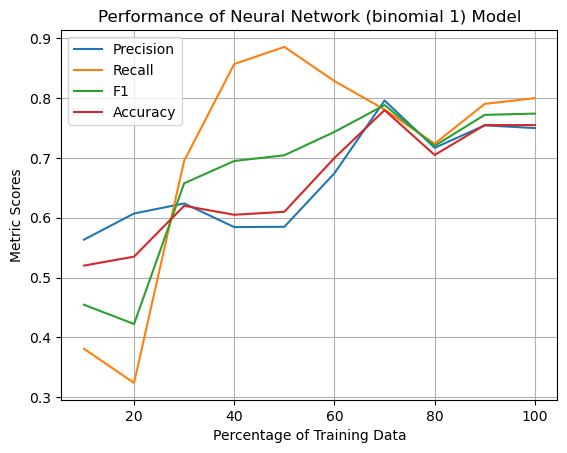

Epoch 1/3


2023-10-26 00:58:16.695387: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [160]
	 [[{{node Placeholder/_1}}]]
2023-10-26 00:58:16.695528: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [160]
	 [[{{node Placeholder/_1}}]]


5/5 [==============================] - 0s 2ms/step - loss: 0.6891 - accuracy: 0.5375
Epoch 2/3
5/5 [==============================] - 0s 2ms/step - loss: 0.6786 - accuracy: 0.6625
Epoch 3/3
5/5 [==============================] - 0s 2ms/step - loss: 0.6664 - accuracy: 0.7500


2023-10-26 00:58:16.888426: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [200,3]
	 [[{{node Placeholder/_0}}]]


Epoch 1/3


2023-10-26 00:58:16.932829: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [320,3]
	 [[{{node Placeholder/_0}}]]
2023-10-26 00:58:16.932981: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [320]
	 [[{{node Placeholder/_1}}]]


10/10 [==============================] - 0s 2ms/step - loss: 0.6929 - accuracy: 0.5406
Epoch 2/3
10/10 [==============================] - 0s 2ms/step - loss: 0.6813 - accuracy: 0.6500
Epoch 3/3
10/10 [==============================] - 0s 2ms/step - loss: 0.6699 - accuracy: 0.7250
Epoch 1/3
 1/15 [=>............................] - ETA: 2s - loss: 0.6815 - accuracy: 0.5938

2023-10-26 00:58:17.264585: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [200,3]
	 [[{{node Placeholder/_0}}]]
2023-10-26 00:58:17.308243: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [480,3]
	 [[{{node Placeholder/_0}}]]
2023-10-26 00:58:17.308391: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [4

15/15 [==============================] - 0s 2ms/step - loss: 0.6897 - accuracy: 0.5083
Epoch 2/3
15/15 [==============================] - 0s 2ms/step - loss: 0.6770 - accuracy: 0.6438
Epoch 3/3
15/15 [==============================] - 0s 1ms/step - loss: 0.6647 - accuracy: 0.7500
Epoch 1/3


2023-10-26 00:58:17.530311: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [200,3]
	 [[{{node Placeholder/_0}}]]
2023-10-26 00:58:17.587635: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [640]
	 [[{{node Placeholder/_1}}]]
2023-10-26 00:58:17.587784: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [640]


20/20 [==============================] - 0s 2ms/step - loss: 0.6920 - accuracy: 0.5406
Epoch 2/3
20/20 [==============================] - 0s 2ms/step - loss: 0.6760 - accuracy: 0.6266
Epoch 3/3
20/20 [==============================] - 0s 1ms/step - loss: 0.6592 - accuracy: 0.6828
Epoch 1/3
 1/25 [>.............................] - ETA: 3s - loss: 0.6953 - accuracy: 0.4688

2023-10-26 00:58:17.841983: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [200,3]
	 [[{{node Placeholder/_0}}]]
2023-10-26 00:58:17.887272: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [800,3]
	 [[{{node Placeholder/_0}}]]
2023-10-26 00:58:17.887425: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [8

25/25 [==============================] - 0s 2ms/step - loss: 0.6901 - accuracy: 0.5387
Epoch 2/3
25/25 [==============================] - 0s 1ms/step - loss: 0.6706 - accuracy: 0.6750
Epoch 3/3
25/25 [==============================] - 0s 1ms/step - loss: 0.6511 - accuracy: 0.7675
Epoch 1/3
 1/30 [>.............................] - ETA: 4s - loss: 0.6922 - accuracy: 0.4375

2023-10-26 00:58:18.151831: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [200,3]
	 [[{{node Placeholder/_0}}]]
2023-10-26 00:58:18.202807: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [960,3]
	 [[{{node Placeholder/_0}}]]
2023-10-26 00:58:18.202960: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [9

30/30 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.4979
Epoch 2/3
30/30 [==============================] - 0s 1ms/step - loss: 0.6765 - accuracy: 0.6406
Epoch 3/3
30/30 [==============================] - 0s 1ms/step - loss: 0.6587 - accuracy: 0.7052
Epoch 1/3


2023-10-26 00:58:18.485145: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [200,3]
	 [[{{node Placeholder/_0}}]]
2023-10-26 00:58:18.530341: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [1120]
	 [[{{node Placeholder/_1}}]]
2023-10-26 00:58:18.530496: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [1120

35/35 [==============================] - 0s 2ms/step - loss: 0.6900 - accuracy: 0.5366
Epoch 2/3
35/35 [==============================] - 0s 1ms/step - loss: 0.6744 - accuracy: 0.6661
Epoch 3/3
35/35 [==============================] - 0s 1ms/step - loss: 0.6569 - accuracy: 0.7607
Epoch 1/3
 1/40 [..............................] - ETA: 5s - loss: 0.6816 - accuracy: 0.6875

2023-10-26 00:58:18.845923: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [200,3]
	 [[{{node Placeholder/_0}}]]
2023-10-26 00:58:18.890715: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [1280,3]
	 [[{{node Placeholder/_0}}]]
2023-10-26 00:58:18.890861: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [

40/40 [==============================] - 0s 1ms/step - loss: 0.6889 - accuracy: 0.5578
Epoch 2/3
40/40 [==============================] - 0s 2ms/step - loss: 0.6689 - accuracy: 0.6969
Epoch 3/3
40/40 [==============================] - 0s 1ms/step - loss: 0.6448 - accuracy: 0.7539
Epoch 1/3


2023-10-26 00:58:19.230162: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [200,3]
	 [[{{node Placeholder/_0}}]]
2023-10-26 00:58:19.276901: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [1440,3]
	 [[{{node Placeholder/_0}}]]
2023-10-26 00:58:19.277048: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [

45/45 [==============================] - 0s 2ms/step - loss: 0.6890 - accuracy: 0.5444
Epoch 2/3
45/45 [==============================] - 0s 1ms/step - loss: 0.6681 - accuracy: 0.7014
Epoch 3/3
45/45 [==============================] - 0s 1ms/step - loss: 0.6440 - accuracy: 0.7701
Epoch 1/3
 1/50 [..............................] - ETA: 7s - loss: 0.7089 - accuracy: 0.4375

2023-10-26 00:58:19.630735: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [200,3]
	 [[{{node Placeholder/_0}}]]
2023-10-26 00:58:19.675466: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [1600]
	 [[{{node Placeholder/_1}}]]
2023-10-26 00:58:19.675624: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [1600

50/50 [==============================] - 0s 2ms/step - loss: 0.6870 - accuracy: 0.5663
Epoch 2/3
50/50 [==============================] - 0s 1ms/step - loss: 0.6572 - accuracy: 0.7369
Epoch 3/3
50/50 [==============================] - 0s 1ms/step - loss: 0.6255 - accuracy: 0.8125
Metrics for Neural Network (binomial 2) when trained on 100% of data
Precision: 0.7241379310344828
Recall: 0.8
F1 score: 0.7601809954751131
Accuracy: 0.735


2023-10-26 00:58:20.078606: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [200,3]
	 [[{{node Placeholder/_0}}]]


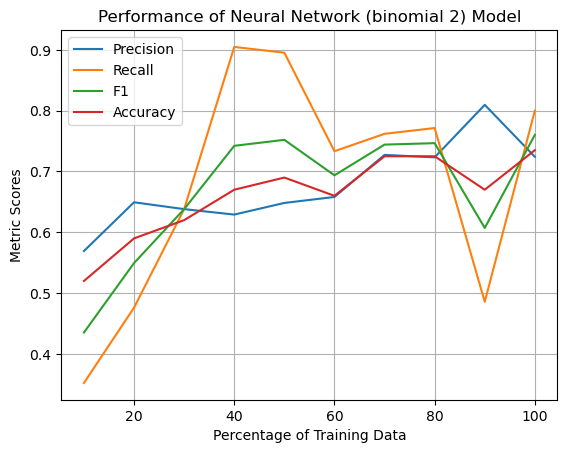

Epoch 1/3


2023-10-26 00:58:20.227539: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [160]
	 [[{{node Placeholder/_1}}]]
2023-10-26 00:58:20.227690: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [160]
	 [[{{node Placeholder/_1}}]]


5/5 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.5188
Epoch 2/3
5/5 [==============================] - 0s 2ms/step - loss: 0.6826 - accuracy: 0.5562
Epoch 3/3
5/5 [==============================] - 0s 2ms/step - loss: 0.6728 - accuracy: 0.6250
Epoch 1/3
 1/10 [==>...........................] - ETA: 1s - loss: 0.6905 - accuracy: 0.5312

2023-10-26 00:58:20.431791: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [200,3]
	 [[{{node Placeholder/_0}}]]
2023-10-26 00:58:20.474008: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [320,3]
	 [[{{node Placeholder/_0}}]]
2023-10-26 00:58:20.474156: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [3

10/10 [==============================] - 0s 2ms/step - loss: 0.6928 - accuracy: 0.5000
Epoch 2/3
10/10 [==============================] - 0s 3ms/step - loss: 0.6815 - accuracy: 0.5594
Epoch 3/3
10/10 [==============================] - 0s 3ms/step - loss: 0.6704 - accuracy: 0.6594
Epoch 1/3
 1/15 [=>............................] - ETA: 2s - loss: 0.6881 - accuracy: 0.5625

2023-10-26 00:58:20.707261: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [200,3]
	 [[{{node Placeholder/_0}}]]
2023-10-26 00:58:20.749682: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [480,3]
	 [[{{node Placeholder/_0}}]]
2023-10-26 00:58:20.749828: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [4

15/15 [==============================] - 0s 2ms/step - loss: 0.6877 - accuracy: 0.5437
Epoch 2/3
15/15 [==============================] - 0s 2ms/step - loss: 0.6747 - accuracy: 0.6896
Epoch 3/3
15/15 [==============================] - 0s 2ms/step - loss: 0.6612 - accuracy: 0.7833
Epoch 1/3


2023-10-26 00:58:20.979644: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [200,3]
	 [[{{node Placeholder/_0}}]]
2023-10-26 00:58:21.025036: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [640,3]
	 [[{{node Placeholder/_0}}]]
2023-10-26 00:58:21.025192: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [6

20/20 [==============================] - 0s 2ms/step - loss: 0.6899 - accuracy: 0.5344
Epoch 2/3
20/20 [==============================] - 0s 1ms/step - loss: 0.6725 - accuracy: 0.6234
Epoch 3/3
20/20 [==============================] - 0s 1ms/step - loss: 0.6547 - accuracy: 0.7078
Epoch 1/3
 1/25 [>.............................] - ETA: 3s - loss: 0.6882 - accuracy: 0.6250

2023-10-26 00:58:21.277925: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [200,3]
	 [[{{node Placeholder/_0}}]]
2023-10-26 00:58:21.326105: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [800]
	 [[{{node Placeholder/_1}}]]
2023-10-26 00:58:21.326262: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [800]


25/25 [==============================] - 0s 2ms/step - loss: 0.6912 - accuracy: 0.5462
Epoch 2/3
25/25 [==============================] - 0s 3ms/step - loss: 0.6725 - accuracy: 0.6862
Epoch 3/3
25/25 [==============================] - 0s 1ms/step - loss: 0.6540 - accuracy: 0.7825
Epoch 1/3
 1/30 [>.............................] - ETA: 4s - loss: 0.6949 - accuracy: 0.5625

2023-10-26 00:58:21.639147: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [200,3]
	 [[{{node Placeholder/_0}}]]
2023-10-26 00:58:21.684713: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [960]
	 [[{{node Placeholder/_1}}]]
2023-10-26 00:58:21.684861: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [960]


30/30 [==============================] - 0s 2ms/step - loss: 0.6884 - accuracy: 0.5635
Epoch 2/3
30/30 [==============================] - 0s 1ms/step - loss: 0.6706 - accuracy: 0.7063
Epoch 3/3
30/30 [==============================] - 0s 1ms/step - loss: 0.6520 - accuracy: 0.7854
Epoch 1/3
 1/35 [..............................] - ETA: 5s - loss: 0.6958 - accuracy: 0.4688

2023-10-26 00:58:21.972134: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [200,3]
	 [[{{node Placeholder/_0}}]]
2023-10-26 00:58:22.017875: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [1120]
	 [[{{node Placeholder/_1}}]]
2023-10-26 00:58:22.018023: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [1120

35/35 [==============================] - 0s 2ms/step - loss: 0.6875 - accuracy: 0.5723
Epoch 2/3
35/35 [==============================] - 0s 1ms/step - loss: 0.6681 - accuracy: 0.6929
Epoch 3/3
35/35 [==============================] - 0s 1ms/step - loss: 0.6470 - accuracy: 0.7795
Epoch 1/3


2023-10-26 00:58:22.334812: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [200,3]
	 [[{{node Placeholder/_0}}]]
2023-10-26 00:58:22.380211: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [1280]
	 [[{{node Placeholder/_1}}]]
2023-10-26 00:58:22.380382: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [1280

40/40 [==============================] - 0s 2ms/step - loss: 0.6848 - accuracy: 0.5766
Epoch 2/3
40/40 [==============================] - 0s 1ms/step - loss: 0.6592 - accuracy: 0.7195
Epoch 3/3
40/40 [==============================] - 0s 1ms/step - loss: 0.6315 - accuracy: 0.8000
Epoch 1/3
 1/45 [..............................] - ETA: 6s - loss: 0.7004 - accuracy: 0.4688

2023-10-26 00:58:22.710758: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [200,3]
	 [[{{node Placeholder/_0}}]]
2023-10-26 00:58:22.754663: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [1440,3]
	 [[{{node Placeholder/_0}}]]
2023-10-26 00:58:22.754812: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [

45/45 [==============================] - 0s 2ms/step - loss: 0.6906 - accuracy: 0.5431
Epoch 2/3
45/45 [==============================] - 0s 1ms/step - loss: 0.6655 - accuracy: 0.7021
Epoch 3/3
45/45 [==============================] - 0s 1ms/step - loss: 0.6356 - accuracy: 0.7993
Epoch 1/3


2023-10-26 00:58:23.106204: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [200,3]
	 [[{{node Placeholder/_0}}]]
2023-10-26 00:58:23.153477: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [1600]
	 [[{{node Placeholder/_1}}]]
2023-10-26 00:58:23.153627: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [1600

50/50 [==============================] - 0s 1ms/step - loss: 0.6893 - accuracy: 0.5512
Epoch 2/3
50/50 [==============================] - 0s 1ms/step - loss: 0.6681 - accuracy: 0.6906
Epoch 3/3
50/50 [==============================] - 0s 1ms/step - loss: 0.6451 - accuracy: 0.7800
Metrics for Neural Network (binomial 3) when trained on 100% of data
Precision: 0.7211538461538461
Recall: 0.7142857142857143
F1 score: 0.7177033492822966
Accuracy: 0.705


2023-10-26 00:58:23.535106: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [200,3]
	 [[{{node Placeholder/_0}}]]


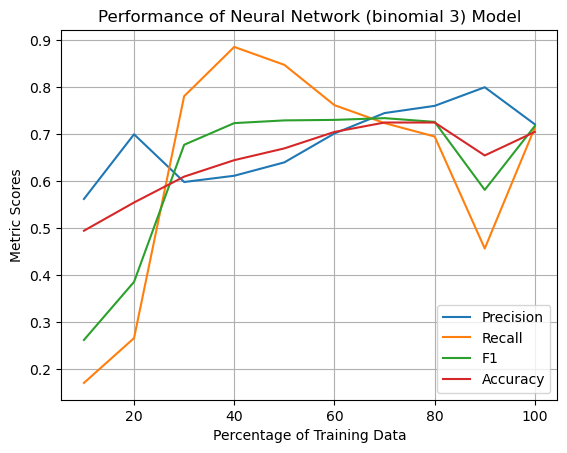

In [7]:
# create the same graph as with NB and LR, with your neural network model instead!
# make sure to re-create your model each time you train it — you don't want to start with
# an already trained network!

# For a model with one hidden layer of 50 units:
# Takes < 15 sec to run on Felix's computer w/ 3 epochs
# Takes < 30 sec to run on Felix's computer w/ 10 epochs
# Takes < 50 sec to run on Felix's computer w/ 20 epochs
# you need not train your model more than 20 epochs
# you should experiment with different numbers of epochs to see how performance varies
# you need not create an experiment that takes > 10 min to run (please do not do this)
def nn_metrics_fun(train_feats, dev_feats, percentage):
    num_epochs = 3
    hidden_units = 100

    model = Sequential()
    model.add(Dense(units=hidden_units, activation="relu", input_dim=len(vocab)))
    # put in an output layer
    model.add(Dense(units=1, activation='sigmoid'))
    # call compile here
    model.compile(loss='binary_crossentropy',
                optimizer='sgd',
                metrics=['accuracy']
                )
    x_train_vectors, y_train = train_feats
    x_dev_vectors, y_dev = dev_feats

    cutoff = int(len(y_train) * percentage)
    model.fit(x_train_vectors[:cutoff], np.array(y_train[:cutoff]), epochs=num_epochs)
    preds = model.predict(x_dev_vectors, verbose=False)
    preds = [np.round(pred[0]) for pred in preds]
    return y_dev, preds

train_feats = (x_train_vectors, y_train)
dev_feats = (x_dev_vectors, y_dev)

dev_y, preds = nn_metrics_fun(train_feats, dev_feats, 1)
_, _, f1, _ = sutils.get_prfa(dev_y, preds)
print(f'F1 Score for multinomial: {f1}')

train_feats_binomial = (x_train_vectors_binomial, y_train)
dev_feats_binomial = (x_dev_vectors_binomial, y_dev)

dev_y, preds = nn_metrics_fun(train_feats_binomial, dev_feats_binomial, 1)
_, _, f1, _ = sutils.get_prfa(dev_y, preds)
print(f'F1 Score for binomial: {f1}')

for i in range(1, 4):
    sutils.create_training_graph(nn_metrics_fun, 
                                 train_feats_binomial, 
                                 dev_feats_binomial, 
                                 kind=f"Neural Network (binomial {i})", 
                                 savepath=f"figures/neural_net_{i}",
                                 verbose=True)



Report the f1 scores for your model with the following settings, using the same number of epochs to train in both cases:
- number of epochs used: __3__
- multinomial features: __0.6480446927374302__ 
- binarized features: __0.7657657657657657__